In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib.ticker import FormatStrFormatter


Bring in the eBid

In [2]:
ebid = pd.read_csv('../data/ebid.csv')

Show eBid data

In [3]:
ebid.head(2)

,Auction Title,Item_Type,Auction ID,Department,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,...,Asset #,Inventory ID,Decal /Vehicle ID,VTR Number,Receipt Number,Cap,Expenses,Net Sales,Fund,Business Unit
0,Dell Laptop w/Bag,Computer,79519,ITS,IT,11/26/2013,78.51,1.81,0.23,18.05,...,NaN,74576,NaN,NaN,3603198592,3000,0.0,60.45,General Fund,0
1,21 Dell Optiplex 760 Computers,Computer,79530,ITS,IT,11/26/2013,451.51,10.38,0.23,103.84,...,NaN,"75160, 75144, 75143, 75165, 75149, 75167, 7514...",NaN,NaN,3604173051,3000,0.0,347.66,General Fund,0


Keep only necessary columns

In [4]:
ebid = ebid[['Auction Title','Item_Type','Auction ID','Budget_Dept','Close Date','Winning Bid','CC Fee','Fee Percent','Auction Fee Subtotal','Expenses','Net Sales']]
ebid['Close Date'] = pd.to_datetime(ebid['Close Date'])

In [5]:
ebid.head(2)

,Auction Title,Item_Type,Auction ID,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,Expenses,Net Sales
0,Dell Laptop w/Bag,Computer,79519,IT,2013-11-26,78.51,1.81,0.23,18.05,0.0,60.45
1,21 Dell Optiplex 760 Computers,Computer,79530,IT,2013-11-26,451.51,10.38,0.23,103.84,0.0,347.66


In [6]:
ebid['Net Sales'].max()

7420000.0

Initiate a categorical breakdown by item category.

In [7]:
category_breakdown = ebid.groupby(["Item_Type"]).sum().sort_values("Net Sales", ascending=False)
category_breakdown.drop(['Auction ID'], axis=1, inplace=True)
category_breakdown

,Winning Bid,CC Fee,Auction Fee Subtotal,Expenses,Net Sales
Item_Type,,,,,
Land,30759652.30,0.00,922789.57,16969.0,30507407.65
Car,9547967.55,40741.35,2167049.49,95689.5,7521087.70
Computer,566740.24,8443.97,130349.42,0.0,436389.24
Electronics,514936.62,7179.70,118435.19,0.0,396501.51
Furniture,326693.55,5921.32,75137.60,0.0,251553.46
Clothing / Shoes,284226.03,3587.67,65371.92,75.0,220770.22
Appliance,237940.76,3756.14,54726.00,395.0,182819.38
Parts,235542.93,3024.81,54174.75,600.0,181521.04
Misc,196968.93,2554.31,45302.53,925.0,150741.19


Show the average net sales for all of eBid sales for all time.

In [8]:
eb_avgnetsales = round(ebid['Net Sales'].mean(), 2)
eb_avgwinningbid = round(ebid['Winning Bid'].mean(), 2)
print(f"The average winning bid was {eb_avgwinningbid} with the average net profit as {eb_avgnetsales}.")

The average winning bid was 1057.13 with the average net profit as 984.41.


Show number of total lots from eBid

In [9]:
ebid['Auction Title'].count()

41146

Show total net sales for all time

In [10]:
ebid['Net Sales'].sum()

40498457.370000005

Show the total amount of auction fees

In [11]:
ebid['Auction Fee Subtotal'].sum()

3819798.6

Overall info about eBid

In [12]:
ebid_desc = ebid.describe()
ebid_desc

,Auction ID,Winning Bid,CC Fee,Auction Fee Subtotal,Expenses,Net Sales
count,41146.000000,4.114600e+04,36949.000000,41146.000000,15888.000000,4.114000e+04
mean,101430.275701,1.057130e+03,2.333023,92.835236,7.484485,9.844059e+02
std,12315.753588,6.337177e+04,13.316911,1939.438334,133.305337,6.300828e+04
min,79519.000000,1.000000e+00,0.000000,0.230000,0.000000,-5.475600e+02
25%,90797.250000,1.100000e+01,0.120000,2.530000,0.000000,8.470000e+00
50%,101550.500000,3.200000e+01,0.510000,7.360000,0.000000,2.464000e+01
75%,112438.750000,7.600000e+01,1.220000,17.480000,0.000000,5.814000e+01
max,122942.000000,7.450000e+06,1122.400000,223500.000000,16269.000000,7.420000e+06


Bring in budget

In [13]:
budget = pd.read_csv('../data/Metro_Budget_to_Actual_Expenses__FY2010_-_Present_.csv')
budget

C:\Users\16153\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Department Description,Business Unit Description,Object Account Description,Dept Match,2010 Budgeted,2010 Actual,2011 Budgeted,2011 Actual,2012 Budgeted,2012 Actual,...,2019 Budgeted,2019 Actual,2020 Budgeted,2020 Actual,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Department Description.1,Dept Matchup
0,Administrative,ADM County Retire Match,Transfer Guaranteed Pension,Misc,3501900.0,3501900.00,3501900.0,3501900.00,3501900.0,3501900.00,...,3501900.0,3501900.00,3501900.0,3501900.00,NaN,NaN,NaN,NaN,Administrative,Misc
1,Administrative,ADM Cnty Teach Retire Match,Transfer Guaranteed Pension,Misc,6900400.0,6900400.00,6900400.0,6900400.00,6900400.0,6900400.00,...,6900400.0,6900400.00,6900400.0,6900400.00,NaN,NaN,NaN,NaN,Metropolitan Council,Leadership
2,Administrative,ADM Health Insurance Match,Employer Group Health,Misc,28309600.0,29163668.82,31105800.0,33822850.04,37124000.0,37237663.96,...,51244600.0,51147253.42,53391800.0,51619782.62,NaN,NaN,NaN,NaN,Metropolitan Clerk,Leadership
3,Administrative,ADM Health Insurance Match,Employer Dental Group,Misc,1823200.0,1831153.10,1926500.0,2012292.17,2172500.0,2205577.01,...,2986400.0,3045002.14,3063700.0,3128416.49,NaN,NaN,NaN,NaN,Mayor's Office,Leadership
4,Administrative,ADM Death Benefit Payments,Transfer Operational,Misc,200000.0,200000.00,200000.0,200000.00,200000.0,200000.00,...,200000.0,200000.00,200000.0,200000.00,NaN,NaN,NaN,NaN,Election Commission,Leadership
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30009,MNPS,MNPS Project 98,Other Special Pay,Education,188500.0,189991.22,185000.0,82822.03,65000.0,71986.41,...,113000.0,90881.36,113000.0,62071.90,NaN,NaN,NaN,NaN,NaN,NaN
30010,MNPS,MNPS Project 98,Security Services,Education,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN
30011,MNPS,MNPS Project 98,Janitorial Srvc,Education,0.0,0.00,0.0,18748.50,10000.0,48625.75,...,75000.0,104935.78,129400.0,158672.50,NaN,NaN,NaN,NaN,NaN,NaN
30012,MNPS,MNPS Project 98,Bus Service,Education,5000.0,0.00,5000.0,0.00,10000.0,0.00,...,0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN


Describe basics about the budget per year

In [14]:
budget.describe()

,2010 Budgeted,2010 Actual,2011 Budgeted,2011 Actual,2012 Budgeted,2012 Actual,2013 Budgeted,2013 Actual,2014 Budgeted,2014 Actual,...,2018 Budgeted,2018 Actual,2019 Budgeted,2019 Actual,2020 Budgeted,2020 Actual,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
count,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,...,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,3.001400e+04,0.0,0.0,0.0,0.0
mean,5.331805e+04,5.947083e+04,5.285780e+04,6.343166e+04,5.526367e+04,6.767961e+04,5.849558e+04,7.182243e+04,6.137324e+04,6.030253e+04,...,7.625510e+04,7.408692e+04,7.656846e+04,7.520500e+04,8.045041e+04,7.675342e+04,NaN,NaN,NaN,NaN
std,7.511063e+05,1.068739e+06,6.577743e+05,1.410321e+06,6.864122e+05,1.713563e+06,7.418520e+05,1.812616e+06,8.309166e+05,8.252874e+05,...,1.242751e+06,1.205115e+06,1.322833e+06,1.296399e+06,1.449095e+06,1.320019e+06,NaN,NaN,NaN,NaN
min,-4.627935e+05,-5.957021e+06,-7.000000e+05,-2.974007e+06,-1.004000e+05,-6.944092e+05,-4.172000e+05,-2.527669e+05,-1.043800e+06,-4.820481e+04,...,-1.478538e+07,-6.664450e+05,-1.834056e+07,-7.086459e+05,-1.312614e+07,-1.199331e+05,NaN,NaN,NaN,NaN
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
75%,1.100000e+03,2.114178e+03,1.800000e+03,2.803505e+03,1.900000e+03,2.785260e+03,1.500000e+03,2.500000e+03,2.000000e+03,2.777342e+03,...,2.400000e+03,3.312325e+03,2.500000e+03,3.477265e+03,2.300000e+03,3.605715e+03,NaN,NaN,NaN,NaN
max,7.587860e+07,1.036613e+08,4.581910e+07,1.647911e+08,4.583350e+07,2.484499e+08,4.989620e+07,2.350336e+08,5.211470e+07,6.039919e+07,...,1.123892e+08,1.133472e+08,1.305525e+08,1.295796e+08,1.379929e+08,1.344181e+08,NaN,NaN,NaN,NaN


In [15]:
budget['2013 Actual'].sum()

2155678536.68

In [16]:
ebid_2013 = ebid[ebid['Close Date'].dt.year == 2013]
ebid_2014 = ebid[ebid['Close Date'].dt.year == 2014]
ebid_2015 = ebid[ebid['Close Date'].dt.year == 2015]
ebid_2016 = ebid[ebid['Close Date'].dt.year == 2016]
ebid_2017 = ebid[ebid['Close Date'].dt.year == 2017]
ebid_2018 = ebid[ebid['Close Date'].dt.year == 2018]
ebid_2019 = ebid[ebid['Close Date'].dt.year == 2019]
ebid_2020 = ebid[ebid['Close Date'].dt.year == 2020]
ebid_2013

,Auction Title,Item_Type,Auction ID,Budget_Dept,Close Date,Winning Bid,CC Fee,Fee Percent,Auction Fee Subtotal,Expenses,Net Sales
0,Dell Laptop w/Bag,Computer,79519,IT,2013-11-26,78.51,1.81,0.23,18.05,0.0,60.45
1,21 Dell Optiplex 760 Computers,Computer,79530,IT,2013-11-26,451.51,10.38,0.23,103.84,0.0,347.66
2,"4 Asanti 24"" Chrome Rims",Parts,79539,Police,2013-11-27,2000.00,0.00,0.23,460.00,0.0,1540.00
3,10Kt Yellow Gold Rope Chain,Clothing / Shoes,79577,Police,2013-12-04,815.00,0.00,0.23,187.45,0.0,627.55
4,Men's Diamond Watch,Clothing / Shoes,79589,Police,2013-12-11,460.00,10.58,0.23,105.80,0.0,354.20
5,Coach Purse,Accessories,79618,Police,2013-12-02,29.00,0.67,0.23,6.67,0.0,22.33
6,1994 Pontiac Firebird,Car,79630,Police,2013-12-05,568.00,0.00,0.23,130.64,105.0,332.36
7,Wheel Chair Lift,Furniture,79662,Education,2013-12-04,158.99,3.66,0.23,36.56,0.0,122.42
8,1 Pallet of Assorted Tires,Parts,79667,Education,2013-12-04,106.00,2.44,0.23,24.38,0.0,81.62
9,3 Catalytic Converters,Parts,79706,Transportation,2013-12-05,125.01,0.00,0.23,28.75,0.0,96.25


In [17]:
year_list = [x for x in range(2013,2021)]
ebid_rev_dict = {2013: ebid_2013, 2014: ebid_2014, 2015: ebid_2015, 2016: ebid_2016, 2017: ebid_2017, 2018: ebid_2018, 2019: ebid_2019, 2020: ebid_2020}
budget_dict = {2013: budget['2013 Budgeted'], 2014: budget['2014 Budgeted'], 2015: budget['2015 Budgeted'], 2016: budget['2016 Budgeted'], 2017: budget['2017 Budgeted'], 2018: budget['2018 Budgeted'], 2019: budget['2019 Budgeted'], 2020: budget['2020 Budgeted']}
budget_amt_list = []
ebid_rev_list = []

for year in year_list:
    ebid_df = ebid_rev_dict[year]
    ebid_rev = ebid_df['Net Sales'].sum()
    budget_df = budget_dict[year]
    budget = budget_df.sum()
    print(f"The {year} budget was {budget} and the ebid total revenue was {ebid_rev}.")
    budget_amt_list.append(budget)
    ebid_rev_list.append(ebid_rev)

The 2013 budget was 1755686202.12 and the ebid total revenue was 5320.510000000001.
The 2014 budget was 1842056400.0 and the ebid total revenue was 9953250.610000003.
The 2015 budget was 1947165801.4799998 and the ebid total revenue was 1831304.37.
The 2016 budget was 2012819700 and the ebid total revenue was 7075993.02.
The 2017 budget was 2145224802.7600002 and the ebid total revenue was 1478426.65.
The 2018 budget was 2288720516.3199997 and the ebid total revenue was 2025627.05.
The 2019 budget was 2298125701.08 and the ebid total revenue was 17725182.04.
The 2020 budget was 2414638703.6 and the ebid total revenue was 403353.12.


In [18]:
ebid_budget_df = pd.DataFrame(list(zip(year_list,budget_amt_list,ebid_rev_list)), columns=['Year','Budget','eBid Revenue'])
# ebid_budget_df.set_index('Year')

In [19]:
ebid_budget_df['Percent Total Budget'] = (ebid_budget_df['eBid Revenue'] / ebid_budget_df['Budget']) * 100
ebid_budget_df  #.set_index('Year')

,Year,Budget,eBid Revenue,Percent Total Budget
0,2013,1.755686e+09,5320.51,0.000303
1,2014,1.842056e+09,9953250.61,0.540334
2,2015,1.947166e+09,1831304.37,0.094050
3,2016,2.012820e+09,7075993.02,0.351546
4,2017,2.145225e+09,1478426.65,0.068917
5,2018,2.288721e+09,2025627.05,0.088505
6,2019,2.298126e+09,17725182.04,0.771289
7,2020,2.414639e+09,403353.12,0.016704


Show percentage of total budget that eBid presents each year.

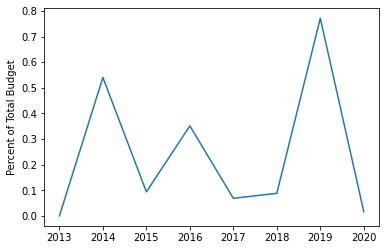

In [20]:
plt.plot(ebid_budget_df['Year'],ebid_budget_df['Percent Total Budget'])
plt.ylabel("Percent of Total Budget")
plt.show()

Show the eBid revenue by year

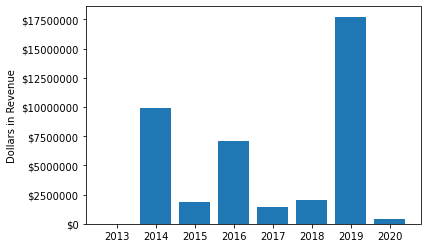

In [21]:
# plt.bar(ebid_budget_df['Year'],ebid_budget_df['eBid Revenue'])
fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(FormatStrFormatter('$%.0f'))
plt.bar(ebid_budget_df['Year'],ebid_budget_df['eBid Revenue'])
plt.ylabel("Dollars in Revenue")
plt.show()

Break eBid down by budget category

In [22]:
budget_cat_breakdown = ebid.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
budget_cat_breakdown.drop(['CC Fee', 'Expenses', "Auction Fee Subtotal", 'Auction ID'], axis=1, inplace=True)
budget_cat_breakdown

,Winning Bid,Net Sales
Budget_Dept,,
Community,26472915.81,26172610.58
Education,6479282.99,6039937.11
Transportation,5770719.68,4645850.94
Police,3766145.31,2864192.10
IT,488908.99,376459.13
Misc,150673.17,116018.66
Utilities,119005.15,91634.21
Court,92344.23,71104.99
Health,75110.40,57834.93


Break down budget by category

In [23]:
budget_breakdown = budget.groupby(["Dept Match"]).sum().sort_values("Net Sales", ascending=False)
# budget_breakdown.drop(['CC Fee', 'Expenses', "Auction Fee Subtotal", 'Auction ID'], axis=1, inplace=True)
budget_breakdown

AttributeError: 'numpy.float64' object has no attribute 'groupby'

Show a breakdown of annual categorical budget comprisal.

In [37]:
budget_amt_list = []
ebid_rev_list = []
annual_cat_breakdown_dict = {}

In [38]:


### Need this thing broken down by category as well. 
### Just to note for myself, I will probably have to indent
### here and add that as another for loop
### with unique values from Budget_Dept.
for year in year_list:
    ebid_df = ebid_rev_dict[year]
    ebid_rev = ebid_df['Net Sales'].sum()
    budget_df = budget_dict[year]
    budget = budget_df.sum()
    budget_cat_breakdown = ebid_df.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
    print(f"The {year} budget was {budget} and the ebid total revenue was {ebid_rev}. The categorical budget breakdown is below.")
    budget_amt_list.append(budget)
    ebid_rev_list.append(ebid_rev)

    annual_cat_breakdown_dict[year] = budget_cat_breakdown

The 2013 budget was 1755686202.12 and the ebid total revenue was 5320.510000000001. The categorical budget breakdown is below.
The 2014 budget was 1842056400.0 and the ebid total revenue was 9953250.610000003. The categorical budget breakdown is below.
The 2015 budget was 1947165801.4799998 and the ebid total revenue was 1831304.37. The categorical budget breakdown is below.
The 2016 budget was 2012819700 and the ebid total revenue was 7075993.02. The categorical budget breakdown is below.
The 2017 budget was 2145224802.7600002 and the ebid total revenue was 1478426.65. The categorical budget breakdown is below.
The 2018 budget was 2288720516.3199997 and the ebid total revenue was 2025627.05. The categorical budget breakdown is below.
The 2019 budget was 2298125701.08 and the ebid total revenue was 17725182.04. The categorical budget breakdown is below.
The 2020 budget was 2414638703.6 and the ebid total revenue was 403353.12. The categorical budget breakdown is below.


In [43]:
cat_list = []
for cat in ebid.Budget_Dept.unique():
    cat_list.append(cat)
for year in year_list:
    df = annual_cat_breakdown_dict[year]
    
    ### I don't know if this needs to go here or further down yet
    ### I at least see that I need to replace the ebid_rev_list with something else...
    ### I need to get Budget dollars summarized by categories per year
    ### I need to sleep.
    ebid_budget_df = pd.DataFrame(list(zip(cat_list,budget_amt_list,ebid_rev_list)), columns=['Category','Budget','eBid Revenue'])
    
    cat_breakdown = ebid_budget_df.groupby(["Budget_Dept"]).sum().sort_values("Net Sales", ascending=False)
    fig, ax = plt.subplots()
    ax.get_yaxis().set_major_formatter(FormatStrFormatter('$%.0f'))
    plt.bar(cat_breakdown['Budget_Dept'],df['eBid Revenue']) 
    plt.label(str(year) + " Categorical Breakdown")
    plt.ylabel("Dollars in Revenue")
    plt.show()

KeyError: 'Budget_Dept'